In [72]:
import numpy as np
import pandas as pd

df = pd.read_csv("TrackShip-9250373.txt", names = ['time', 'imo', 'vessel type', 'location', 'eta', 'lat', 'long', 'course', 'speed']) 

df['lat'] =  df['lat'].str[:-2]
df['long'] =  df['long'].str[:-2]

df['lat']=df['lat'].astype(float)
df['long']=df['long'].astype(float)

df['speed']=df['speed'].astype(float)
df['speed']=df['speed'].fillna(0)


df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
df

imo     vessel type       location            eta  \
time                                                                         
2017-01-12 00:00:57  9250373  Hopper Dredger  VW HOOFDPLAAT  Jan 11, 02:00   
2017-01-12 00:03:26  9250373  Hopper Dredger  VW HOOFDPLAAT  Jan 11, 02:00   
2017-01-12 00:05:57  9250373  Hopper Dredger  VW HOOFDPLAAT  Jan 11, 02:00   
2017-01-12 00:08:28  9250373  Hopper Dredger  VW HOOFDPLAAT  Jan 11, 02:00   
2017-01-12 00:10:58  9250373  Hopper Dredger  VW HOOFDPLAAT  Jan 11, 02:00   
...                      ...             ...            ...            ...   
2017-05-29 22:39:08  9250373  Hopper Dredger           GENT  May 29, 23:00   
2017-05-29 22:41:44  9250373  Hopper Dredger           GENT  May 29, 23:00   
2017-05-29 22:44:19  9250373  Hopper Dredger           GENT  May 29, 23:00   
2017-05-29 22:46:59  9250373  Hopper Dredger           GENT  May 29, 23:00   
2017-05-29 22:49:42  9250373  Hopper Dredger           GENT  May 29, 23:00   

                          lat     long  course  speed  
time                                                   
2017-01-12 00:00:57  51.61343  3.32775    96.0   11.5  
2017-01-12 00:03:26  51.61343  3.32775    96.0   11.5  
2017-01-12 00:05:57  51.61130  3.35322    98.0   10.6  
2017-01-12 00:08:28  51.61130  3.35322    98.0   10.6  
2017-01-12 00:10:58  51.60533  3.37295   146.0   10.9  
...                       ...      ...     ...    ...  
2017-05-29 22:39:08  51.07982  3.74123    81.0    0.0  
2017-05-29 22:41:44  51.07982  3.74122    81.0    0.0  
2017-05-29 22:44:19  51.07982  3.74122    81.0    0.0  
2017-05-29 22:46:59  51.07982  3.74123    81.0    0.0  
2017-05-29 22:49:42  51.07982  3.74123    81.0    0.0  

[77213 rows x 8 columns]

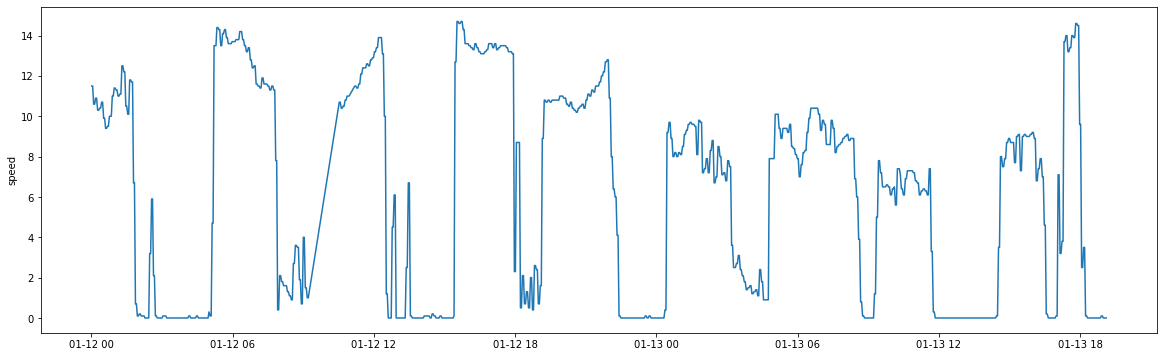

In [73]:
x= df['speed'][0:1000]
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.plot(x)
plt.ylabel('speed')
plt.show()

In [76]:
locations = df[['lat', 'long']]
#locations = locations.iloc[::500, :]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[0]

# locationlist = locationlist[0:100]


locationlist
len(locationlist)


77213

In [77]:
import pandas as pd
import folium
from folium.plugins import FastMarkerCluster

rome_lat, rome_lng  = locationlist[0]

my_map = folium.Map(location=[rome_lat, rome_lng], zoom_start=4)
# add all the point from the file to the map object using FastMarkerCluster

# for each in locationlist:
#     folium.Marker(each).add_to(my_map)    
my_map.add_child(FastMarkerCluster(locationlist))

folium.PolyLine(locationlist, color="red", weight=2.5, opacity=1).add_to(my_map)

# save the map 
my_map.save("save_file.html")
my_map

In [ ]:
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np

# df = df[['lat', 'long', 'course', 'speed']]
# df
# t = df['speed']
# # Data for plotting
# fig, ax = plt.subplots()
# ax.plot(t)

# plt.show()

In [ ]:
# df = df[2680:60000]
# new_df=df['speed'][1220:1330]
# fig, ax = plt.subplots()
# ax.plot(new_df)
# ax.grid()
# plt.show()

In [ ]:
# df = pd.read_csv('df.csv')


# plt.figure()
# plt.plot(df['long'],df['lat'],'m')
# plt.axis('equal')
# plt.show()

# y = df['lat'].values
# y = (200-530)/(max(y)-min(y))*(y-max(y))+200
# x = df['long'].values
# x = (1000-420)/(max(x)-min(x))*(x-max(x))+1000


# fig, ax = plt.subplots()
# img = plt.imread("zld.PNG")
# ax.imshow(img)
# ax.plot(x,y,'ro',markersize=0.1)
# plt.axis('off')
# plt.title('Scheldt river')
# plt.savefig('merged2.png',dpi=1000)
# plt.show()

In [ ]:
import folium
map = folium.Map(location=[51.30191, 4.2689900000000005], zoom_start=20)
for point in range(0, len(locationlist)):
    icon = folium.Icon(icon_size=(5, 5), color='green')
    folium.Marker(locationlist[point], icon=icon).add_to(map)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


#Exercise 1
df = pd.read_csv("TrackShip-9279123.txt",header=None)
df.columns = ['time', 'imo', 'vessel type', 'location', 'eta', 'lat', 'long', 'course', 'speed']
df['lat'] = df['lat'].str[:-2]
df['long'] = df['long'].str[:-2]
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)
df['speed'] = df['speed'].astype(float)
df['speed'] = df['speed'].fillna(0)
df['course'] = df['course'].astype(float)
df['time'] = pd.to_datetime(df['time'])
df = df.drop_duplicates()
df = df.set_index('time')

C:\Users\answe\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


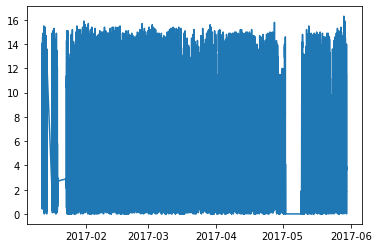

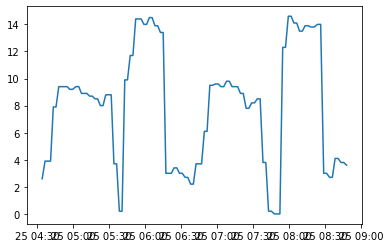

In [3]:
#Exercise 2
plt.plot(df['speed'])
plt.show()
df = df[2680:60000]
df = df[['lat','long','course','speed']]
df.to_csv('df.csv')

plt.figure()
plt.plot(df['speed'][1220:1330])
plt.show()

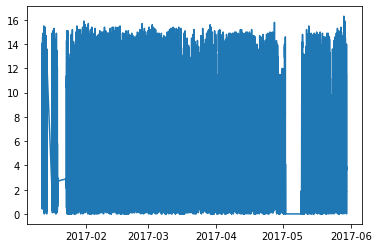

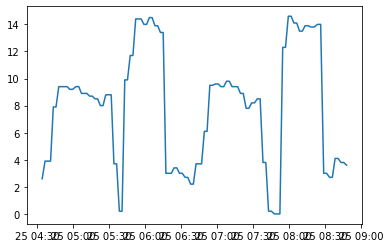

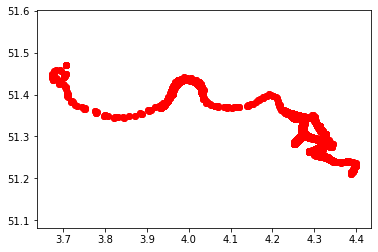

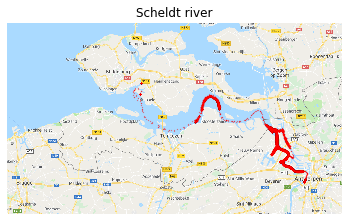

In [78]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 30 21:13:58 2018

@author: r.dewinter
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


#Exercise 1
df = pd.read_csv("TrackShip-9279123.txt",header=None)
df.columns = ['time', 'imo', 'vessel type', 'location', 'eta', 'lat', 'long', 'course', 'speed']
df['lat'] = df['lat'].str[:-2]
df['long'] = df['long'].str[:-2]
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)
df['speed'] = df['speed'].astype(float)
df['speed'] = df['speed'].fillna(0)
df['course'] = df['course'].astype(float)
df['time'] = pd.to_datetime(df['time'])
df = df.drop_duplicates()
df = df.set_index('time')

#Exercise 2
plt.plot(df['speed'])
plt.show()
df = df[2680:60000]
df = df[['lat','long','course','speed']]
df.to_csv('df.csv')

plt.figure()
plt.plot(df['speed'][1220:1330])
plt.show()

#Exercise 3

df = pd.read_csv('df.csv')
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')

plt.figure()
plt.plot(df['long'],df['lat'],'ro')
plt.axis('equal')
plt.show()

y = df['lat'].values
y = (200-530)/(max(y)-min(y))*(y-max(y))+200
x = df['long'].values
x = (1000-420)/(max(x)-min(x))*(x-max(x))+1000


fig, ax = plt.subplots()
img = plt.imread("zld.PNG")
ax.imshow(img)
ax.plot(x,y,'ro',markersize=0.1)
plt.axis('off')
plt.title('Scheldt river')
plt.savefig('merged2.png',dpi=1000)
plt.show()

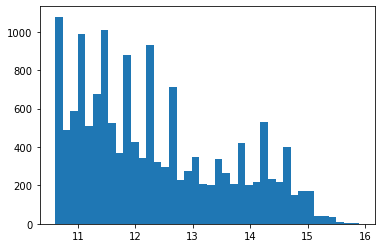

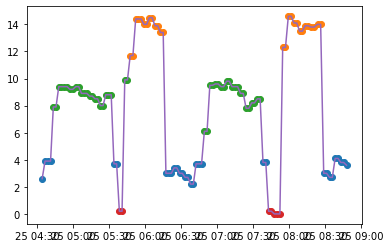

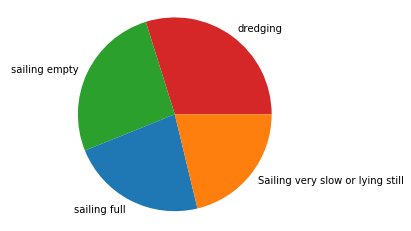

In [79]:
clusters = 4
kmeans = KMeans(n_clusters=clusters, random_state=1337,max_iter=300).fit(df[['speed']])
df['activity'] = kmeans.labels_

plt.figure()
plt.hist(df['speed'][df['activity']==1], bins=40)
plt.show()

plt.figure()
for i in range(clusters):
    plt.plot(df['speed'][1220:1330][kmeans.labels_[1220:1330]==i],'o')
plt.plot(df['speed'][1220:1330])
plt.show()

freq = df['activity'].value_counts()

plt.figure()
plt.pie(freq,
        labels=['dredging', 'sailing empty', 'sailing full', 'Sailing very slow or lying still'], 
        colors=['#d62728','#2ca02c','#1f77b4','#ff7f0e'])
plt.axis('equal')
plt.show()

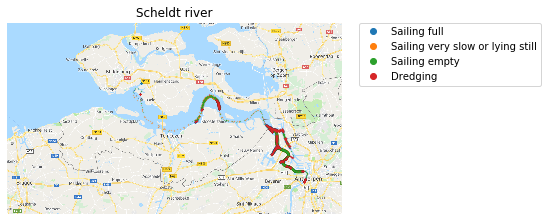

In [80]:
y = df['lat'].values
y = (200-530)/(max(y)-min(y))*(y-max(y))+200
x = df['long'].values
x = (1000-420)/(max(x)-min(x))*(x-max(x))+1000

img = plt.imread("zld.PNG")
fig, ax = plt.subplots()
ax.imshow(img)
ax.plot(x[df['activity']==0],y[df['activity']==0],'o',markersize=0.1, label='Sailing full')
ax.plot(x[df['activity']==1],y[df['activity']==1],'o',markersize=0.1, label='Sailing very slow or lying still')
ax.plot(x[df['activity']==2],y[df['activity']==2],'o',markersize=0.1, label='Sailing empty')
ax.plot(x[df['activity']==3],y[df['activity']==3],'o',markersize=0.1, label='Dredging')

plt.axis('off')
plt.title('Scheldt river')
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
lgd.legendHandles[0]._legmarker.set_markersize(6)
lgd.legendHandles[1]._legmarker.set_markersize(6)
lgd.legendHandles[2]._legmarker.set_markersize(6)
lgd.legendHandles[3]._legmarker.set_markersize(6)

plt.savefig('merged3.png',bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=1000)